<a href="https://colab.research.google.com/github/NazarovMM/mmo_course_2023/blob/main/LR2/MMO_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методы машинного обучения ЛР2
## Обработка признаков (часть 1)
### Выполнил студент группы ИУ5-25М Назаров М.М.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [ ]:
data = pd.read_csv('/content/dhak city hospital main - dhak city hospital 1.csv final.csv')

# Создание копии данных для сравнения
data_before = data.copy()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1100 non-null   object 
 1   ratings            867 non-null    float64
 2   Number of ratings  861 non-null    object 
 3   catagory           1100 non-null   object 
 4   address            1084 non-null   object 
 5   open 24 hrs        810 non-null    object 
 6   link               582 non-null    object 
 7   comments           399 non-null    object 
dtypes: float64(1), object(7)
memory usage: 68.9+ KB


In [ ]:
data.shape

(1100, 8)

In [ ]:
data.isnull().sum()

Name                   0
ratings              233
Number of ratings    239
catagory               0
address               16
open 24 hrs          290
link                 518
comments             701
dtype: int64

In [ ]:
# Вычисление квартиля 75% для столбца "Rating"
q3 = np.percentile(data["ratings"].dropna(), 75)

# Вычисление медианы для столбца "Rating"
median_rating = data["ratings"].median()

# Заполнение пропущенных значений "хвостом распределения"
data["ratings"].fillna(q3 + 1.5*(q3-median_rating), inplace=True)

In [ ]:
# Удаление запятых из столбца "Number of ratings"
data["Number of ratings"] = data["Number of ratings"].str.replace(',', '')

# Вычисление медианы столбца "Number of ratings"
median_num_ratings = data["Number of ratings"].median()

# Заполнение пропущенных значений медианой
data["Number of ratings"].fillna(median_num_ratings, inplace=True)

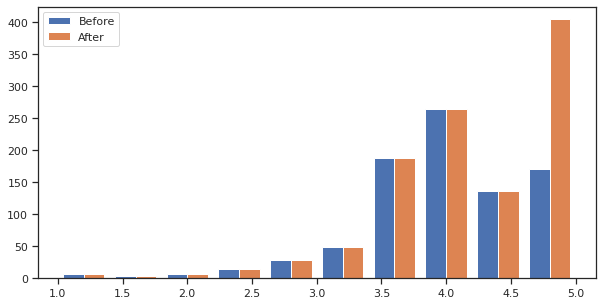

In [ ]:
# Обработка пропусков в данных
#data = data.fillna(method='bfill')

# Создание гистограммы сравнения до и после обработки пропусков для определенного признака
plt.figure(figsize=(10, 5))
plt.hist([data_before['ratings'], data['ratings']], label=['Before', 'After'], bins=10)
plt.legend()
plt.show()

In [ ]:
data.isnull().sum()

Name                   0
ratings                0
Number of ratings      0
catagory               0
address               16
open 24 hrs          290
link                 518
comments             701
dtype: int64

In [ ]:
data['open 24 hrs'].unique()

array(['Yes', 'No', nan, '·', '01715-424437', '02-55067131',
       'Temporarily closed'], dtype=object)

In [ ]:
# Заполнение пропущенных значений в столбце "open 24 hrs"
data["open 24 hrs"].fillna('Temporarily closed', inplace=True)

# Замена значений, отличных от 'Yes', 'No' и 'Temporarily closed', на 'Temporarily closed'
data.loc[~data["open 24 hrs"].isin(['Yes', 'No', 'Temporarily closed']), "open 24 hrs"] = 'Temporarily closed'

In [ ]:
data.isnull().sum()

Name                   0
ratings                0
Number of ratings      0
catagory               0
address               16
open 24 hrs            0
link                 518
comments             701
dtype: int64

In [ ]:
# Удаление столбцов "link" и "comments"
data = data.drop(["link", "comments"], axis=1)

In [ ]:
# Удаление строк с пустыми значениями в столбце "address"
data = data.dropna(subset=["address"])

In [ ]:
data.isnull().sum()

Name                 0
ratings              0
Number of ratings    0
catagory             0
address              0
open 24 hrs          0
dtype: int64

In [ ]:
data['open 24 hrs'].unique()

array(['Yes', 'No', 'Temporarily closed'], dtype=object)

In [ ]:
# Замена категорий целочисленными значениями в столбце "open 24 hrs"
data["open 24 hrs"] = data["open 24 hrs"].replace({"Yes": 1, "No": 0, "Temporarily closed": -1})

In [ ]:
data['open 24 hrs'].unique()

array([ 1,  0, -1])

In [ ]:
data["open 24 hrs"].value_counts()

 1    504
-1    323
 0    257
Name: open 24 hrs, dtype: int64

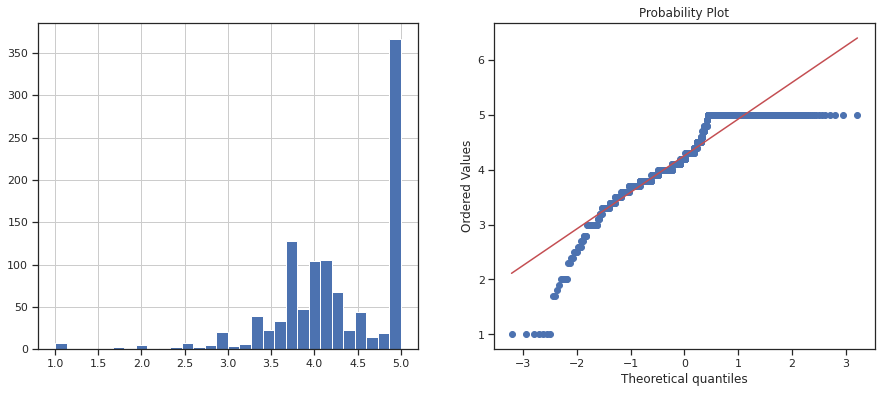

In [ ]:
diagnostic_plots(data, 'ratings')

Оптимальное значение λ = 2.6187076052106115


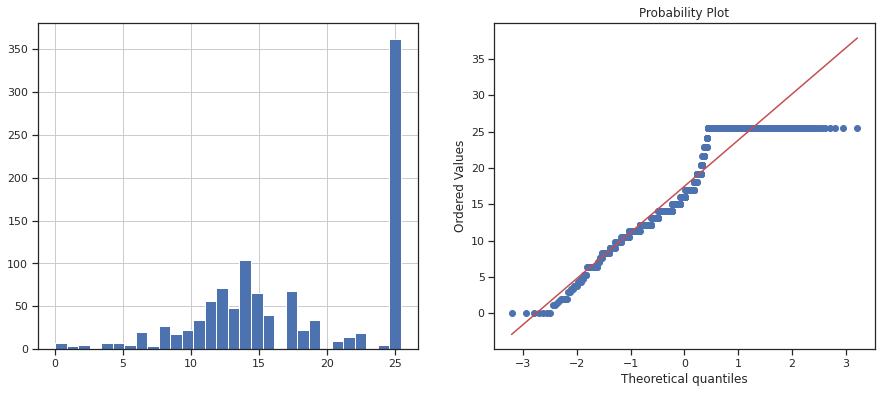

In [ ]:
data['ratings_boxcox'], param = stats.boxcox(data['ratings']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'ratings_boxcox')

Оптимальное значение λ = 3.1539278178303283


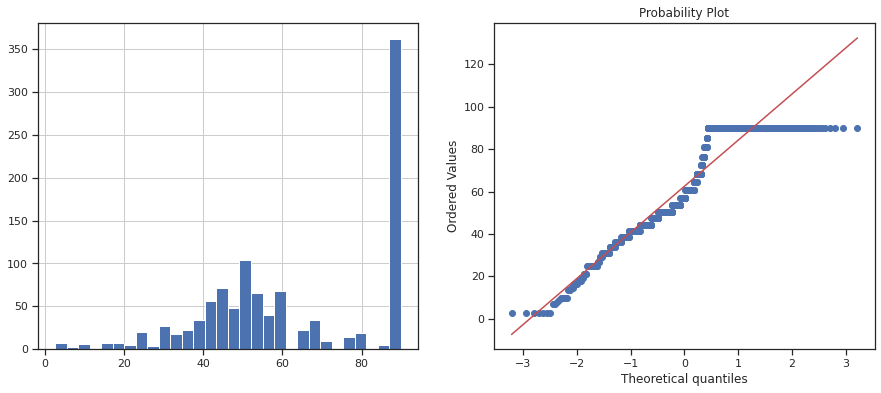

In [ ]:
# Необходимо преобразовать данные к действительному типу
data['ratings'] = data['ratings'].astype('float')
data['ratings_yeojohnson'], param = stats.yeojohnson(data['ratings']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'ratings_yeojohnson')